In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
imgs = np.fromfile('MNIST/train-images-idx3-ubyte', dtype=np.uint8)
imgs = np.reshape(imgs[16:], [-1, 28, 28])
tests = np.fromfile('MNIST/t10k-images-idx3-ubyte', dtype=np.uint8)
tests = np.reshape(imgs[16:], [-1, 28, 28])

labs = np.fromfile('MNIST/train-labels-idx1-ubyte', dtype=np.uint8)
labs = labs[8:]
testlabs = np.fromfile('MNIST/t10k-labels-idx1-ubyte', dtype=np.uint8)
testlabs = labs[8:]

In [3]:
#computes the mean of a given list of matrices (pics)
def mean(pics):
    dim1 = len(pics[1])
    dim2 = len(pics[1][1])
    b = np.empty((dim1,dim2))
    for i in range(dim1):
        for j in range(dim2):
            b[i][j] = 1/len(pics) * np.sum(pics[:,i,j])
    return b

In [4]:
#computes the variance of a given list of matrices (pics)
def variance(pics):
    dim1 = len(pics[1])
    dim2 = len(pics[1][1])
    V = np.empty((dim1,dim2))
    means = mean(pics)
    for i in range(dim1):
        for j in range(dim2):
            V[i][j] = 1/len(pics) * np.sum((pics[:,i,j] - means[i,j])**2)
    return V

In [5]:
#function for ordering the digits in the dataset with respect to the labels
def ins(N):
    indices = np.empty((10,N))
    for j in range(10):
        count = 0
        for i in range(len(labs)):
            if labs[i] == j:
                indices[j,count] = i
                count += 1
            if count == N: 
                break
    indices = indices.astype(int)
    return indices

In [6]:
#vectorize the data
def vec(data):
    M = data[0]
    M = np.array([M.flatten("F")])
    for i in range(len(data)-1):
        a = data[i+1]
        a = np.array([a.flatten("F")])
        M = np.concatenate((M, a),axis=0)
    return np.transpose(M)

In [7]:
#computation of the subspace
def subspace(pics,N,princomps):
    means = mean(pics[:N])
    means = np.asarray([means for i in range(N)])
    Y = vec(pics[:N]) - vec(means)
    u, sing, v = np.linalg.svd(np.asarray(Y))
    A = u[:, (-sing**2).argsort()[:princomps]]
    return np.asarray(A),means

In [8]:
#project data onto subspace
def project(pics,N,princomps,testdata):
    sub, means = subspace(pics,N,princomps)
    testdata = vec(testdata)
    means = vec(means[:len(testdata.T)])
    return ((sub@sub.T)@(testdata - means) + means).T

In [9]:
def kMeans(n,H):
    schwerP = np.mean(H,0)

    startPs = schwerP + np.random.rand(len(H[0]) , n)
    
    for i in range(100):
        a = np.linalg.norm(np.array([startPs-H[x] for x in range(len(H))]),axis=2)**2
        k = np.argmin(a,axis=1)
        k = k.T
        newStart = np.array([np.mean(H[np.where(k==x)],0) for x in range(n)])
        color  = ["red" if x == 0 else "blue" for x in k]
        if np.all( startPs == newStart):
            break
        startPs = newStart
        
        P= startPs
        plt.scatter(H@np.array([1,0]) ,H@np.array([0,1]), color= color)
        plt.scatter(P@np.array([1,0]) ,P@np.array([0,1]))
        plt.show()        
    return startPs

In [10]:
#plot the mean values of the first 100 digits (0-9), respectively
def Aufgabe1a():
    indices = ins(100)
    means = [mean(imgs[indices[i,:]]) for i in range(10)]
    width=5
    height=5
    rows = 2
    cols = 5
    axes=[]
    fig=plt.figure()

    for a in range(rows*cols):
        axes.append(fig.add_subplot(rows, cols, a+1) )
        plt.imshow(means[a])
    fig.tight_layout()    
    plt.show()

In [11]:
#plot the variance values of the first 100 digits (0-9), respectively
def Aufgabe1b():
    indices = ins(100)
    variances = [variance(imgs[indices[i,:]]) for i in range(10)]
    width=5
    height=5
    rows = 2
    cols = 5
    axes=[]
    fig=plt.figure()

    for a in range(rows*cols):
        axes.append(fig.add_subplot(rows, cols, a+1) )
        plt.imshow(variances[a])
    fig.tight_layout()    
    plt.show()

In [12]:
#calulate the covariance matrix S = Y * Y^T for the first 1000 digits and compute the 
#eigenvalues of S and the singularvalues of Y and pllot them
def Aufgabe2():
    N = 1000

    means2 = mean(imgs[:N])
    Y = np.empty((28*28,N)).astype(float)
    for i in range(N):
        Y[:,i] = imgs[i].flatten('F') - means2.flatten('F')
    S = np.matmul(Y,np.transpose(Y))
    eigens = np.linalg.eig(S)
    singvals = np.linalg.svd(Y)[1]
    #plot eigenvalues and singularvalues
    plt.figure()
    fig, axes = plt.subplots(2,1,figsize=(7,5))
    axes[0].semilogy(eigens[0][:50])
    axes[0].set_xlabel('index')
    axes[0].set_ylabel('Eigenvalue')
    axes[0].legend(fontsize=12)
    axes[1].semilogy(singvals[:50]**2)
    axes[1].set_xlabel('index')
    axes[1].set_ylabel('(Singular value)^2')

    plt.tight_layout()
    plt.show()

In [13]:
#compute principal components of covariance matrix and mean of first 1000 digits
def Aufgabe3a():
    sub, b = subspace(imgs,1000,5)
    A = np.asarray([x.reshape(28,28,order="F") for x in sub.T])
    width=10
    height=10
    rows = 2
    cols = 3
    axes=[]
    fig=plt.figure()

    for i in range(5):
        axes.append(fig.add_subplot(rows, cols, i+1) )
        plt.imshow(A[i])
        axes[i].set_title(str(i+1)+'. principal component',fontsize=9)
    axes.append(fig.add_subplot(rows,cols,6))
    plt.imshow(b[0])
    axes[5].set_title('mean',fontsize=9)
    fig.tight_layout()    
    plt.show()

In [14]:
def Aufgabe3b():
    projected = project(imgs,1000,5,np.asarray(tests[:4]))

    for i in range(4):
        fig, axs = plt.subplots(nrows=1, ncols=2)
        axs[0].imshow(projected[i].reshape((28,28),order='F'))
        axs[0].title.set_text('reduced data')
        axs[1].imshow(tests[i])
        axs[1].title.set_text('testdata')
        fig.tight_layout()    
        plt.show()

In [15]:
def kmeans(dataset):
    r0 = mean(dataset[0])
    r0 = [r0 for i in range(1000)]
    r1 = mean(dataset[1])
    r1 = [r1 for i in range(1000)]
    r = [r0,r1]
    for i in range(len(dataset[1])):
        a = [np.linalg.norm(dataset[i] - r[i])**2 for i in range(2)]
        k = np.argmin(a,axis=0)
        dataset = np.array([np.mean(dataset[np.where(k==x)],0) for x in range(2)])
        color  = ["red" if x == 0 else "blue" for x in k]
        if np.all( startPs == newStart):
            break
        startPs = newStart
        
        P= startPs
        plt.scatter(testdata@np.array([1,0]) ,testdata@np.array([0,1]), color= color)
        plt.scatter(P@np.array([1,0]) ,P@np.array([0,1]))
        plt.show()        
    return startPs

In [16]:
def Aufgabe4():
    indices = ins(1000)
    dataset = np.concatenate((imgs[indices[0]],imgs[indices[1]]),axis=0)
    sub, means = subspace(dataset,len(dataset),2)
    projected = np.array((sub.T@(vec(dataset)-vec(means))).T)

    P = kMeans(2,projected)
    
    plt.scatter(projected@np.array([1,0]) ,projected@np.array([0,1]))
    plt.scatter(P@np.array([1,0]) ,P@np.array([0,1]))
    plt.show()

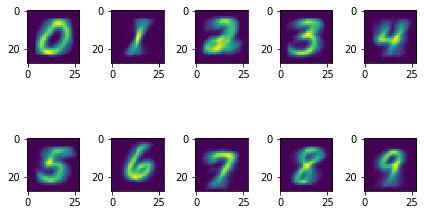

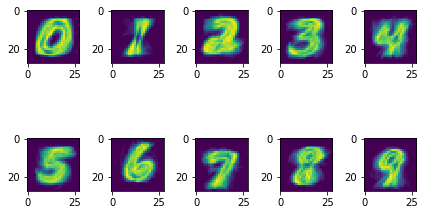

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

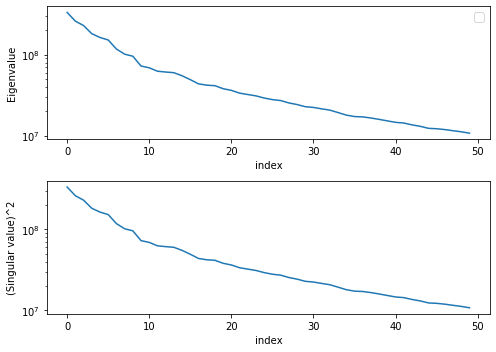

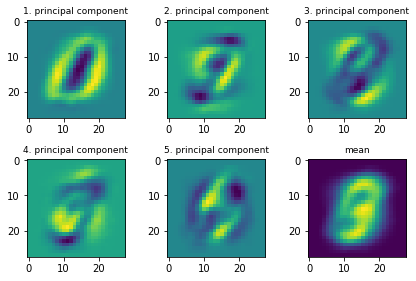

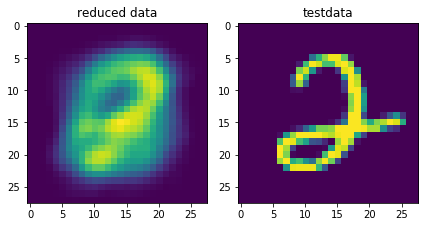

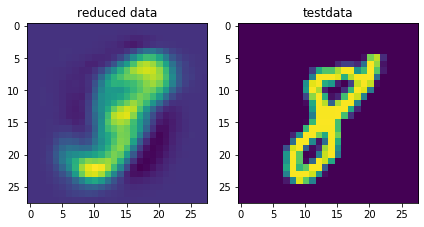

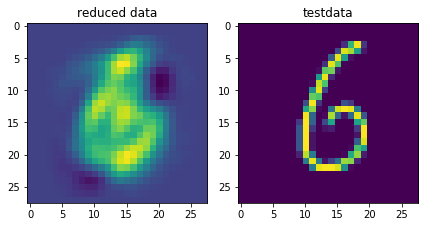

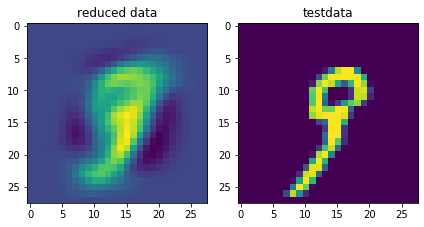

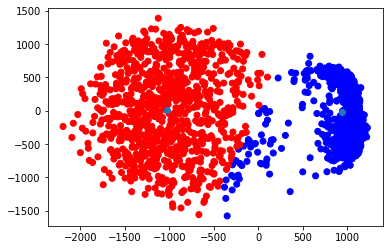

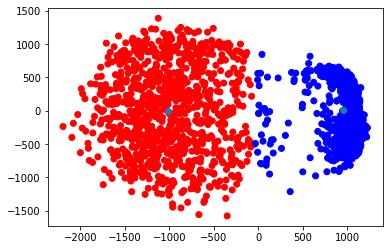

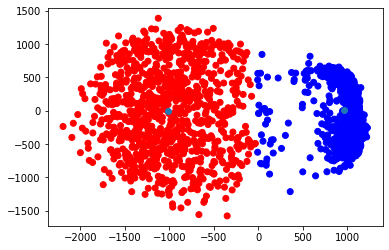

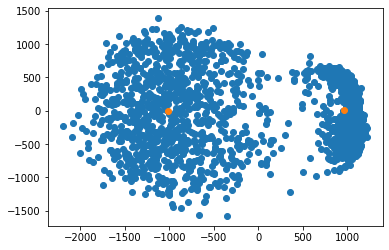

In [17]:
Aufgabe1a()
Aufgabe1b()
Aufgabe2()
Aufgabe3a()
Aufgabe3b()
Aufgabe4()